# Homework 1: This HW is based on the code for Multiple Variable Linear Regression

## Instructions: 

Place the answer to your code only in the area specified. Also, make sure to run all your code (e.g., if you are running the code on your local machine, press >> to "Restart Kernel and Run All Cells"). This should plot all outputs including your answers to homework questions. After this, go to file (top left) and select "Print". Save your file as a PDF and upload the PDF to Canvas. This is one way to generate a PDF. You can also search for other methods to generate a PDF from Jupyter.

In [58]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline is a magic function that makes plots appear next to code and be stored in notebook:
https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

## Diabetes Data Example
To illustrate the concepts, we load the well-known diabetes data set.  This dataset is included in the `sklearn.datasets` module and can be loaded as follows.

In [59]:
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

We can print a description of the data as follows:

In [60]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

The target values are stored in the vector `y`.  The attributes for the diabetes data are stored in a data matrix, `X`.  The size is is number of samples (442) x number of attributes (10).

In [61]:
nsamp, natt = X.shape
print("num samples={0:d}  num attributes={1:d}".format(nsamp,natt))

num samples=442  num attributes=10


In the code above, we use the fromat method to help with output formatting. You use {} to indicate 
where the output would be substituted and you provide the variable to be used inside the format method, see more:
https://docs.python.org/3/tutorial/inputoutput.html

## Question 1 (2 points):
Print the ages of the first five subjects?

In [62]:
print(X[:5, 0])

[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306]


## Question 2 (2 points):
Print the attributes S1-S3 for subjects 10-15

In [63]:
print(X[9:15, 4:7])

[[-1.25765827e-02 -3.45076144e-02 -2.49926566e-02]
 [-1.03389471e-01 -9.05611890e-02 -1.39477432e-02]
 [-7.07277125e-03  4.59715403e-02 -6.54906725e-02]
 [-4.32086554e-03 -9.76888589e-03  4.49584616e-02]
 [-4.32086554e-03 -1.57187067e-02 -2.90282981e-03]
 [ 1.76943802e-02 -6.12835791e-05  8.17748397e-02]]


## Question 3 (2 points):
Create a scatter plot of the target variable, `y` vs. the BMI.  Does there seem to be a relation?  What about `y` vs. the age?  Which is a better predictor?  

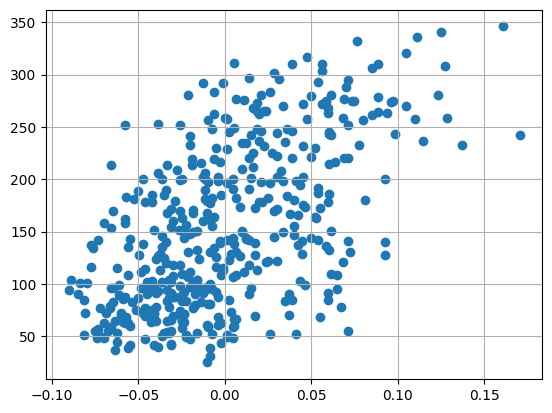

In [64]:
plt.scatter(X[:, 2], y)
plt.grid()

## Question 4 (2 points):

You are given target values `y` and features `x1` and `x2` below.  Fit the model on the first 4 data points and test the model on the fifth data point.  You may want to use the following steps

*  Construct the training training data `X_tr,y_tr`
*  Create a regression object `regr = linear_model.LinearRegression()`
*  Fit the model with the `regr.fit()` method
*  Predict the value on the test value with the `regr.predict()`

In [65]:
x1 = np.array([0,1,3,5,4])
x2 = np.array([0,0.7, 4.3, 15.1, 13.2])
y = np.array([-2, -0.9, 1.5, 18, 13])

X = np.vstack((x1, x2)).T

X_tr = X[:4, :]
y_tr = y[:4]
# print(X_tr)
# print(y_tr)

regr = linear_model.LinearRegression()
regr.fit(X_tr, y_tr)

X_test = X[4:5, :]
# print(X_test)
y_tr_pred = regr.predict(X_test)
# print(y_tr_pred)

print(f"Predicted value: {y_tr_pred[0]:.2f}")
print(f"Actual value: {y[4]:.2f}")

Predicted value: 15.98
Actual value: 13.00


## Question 5 (2 points):
Describe the 1SE rule in cross validation and how the model order is selected based on the value of fitness score, i.e., whether a higher or lower firness score is desired and how the model order is determined.